In [2]:
#importing numpy
import numpy as np

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [5]:

list_temp=[]
list_PC=[]
list_PE=[]
counter=0
file = open('RMN_31P_fit_25perc_DIM.csv', "r")

for line in file.readlines():

    if counter > 0:
        line_values = line.split()
        values = [float(x) for x in line_values]
        list_temp.append(int(values[0]))
        list_PC.append(values[1])
        list_PE.append(values[2])        
    counter=counter+1


[3.06471107e+02 2.29589237e-01 9.63997644e+01]
[3.04457281e+02 2.64074938e-01 8.70287329e+01]


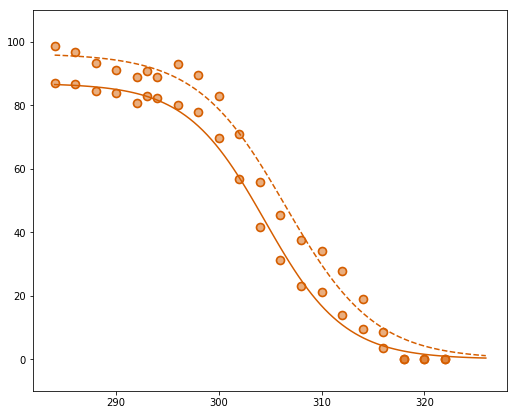

In [7]:
xdata = np.linspace(284, 326, 100)

def sigmoid(x, xo,k, A):
    y = A-A/(1+ np.exp(-k*(x-xo)))
    return y

p_start1=[284,0.3,80]
p_start2=[284,0.3,80]

list_err=[5] * len(list_temp)

popt1, pcov1 = curve_fit(sigmoid, list_temp, list_PC, p0=p_start1, sigma=list_err, bounds=(0, [400.,0.3, 120.]))
popt2, pcov2 = curve_fit(sigmoid, list_temp, list_PE, p0=p_start2, sigma=list_err, bounds=(0, [400.,0.3, 100.]))


print popt1
print popt2

fig = plt.figure(figsize=(8.5, 7))
ax = fig.add_subplot(111)

# based on values in Table S3 (PC)
ax.plot(xdata, sigmoid(xdata, *[306.5,0.23,96.4]), "--", color='#d55e00')
ax.plot(list_temp, list_PC,'o', markersize=8, mew='1.5', color='#d55e00',alpha=0.5)
ax.plot(list_temp, list_PC,'o', markersize=8, mew='1.5', color='#d55e00',markerfacecolor='none')

# based on values in Table S3 (PE)
ax.plot(xdata, sigmoid(xdata, *[304.5,0.26,87]), "-", color='#d55e00')
ax.plot(list_temp, list_PE,'o', markersize=8, mew='1.5', color='#d55e00',alpha=0.5)
ax.plot(list_temp, list_PE,'o', markersize=8, mew='1.5', color='#d55e00',markerfacecolor='none')

plt.ylim(-10,110)

fig.savefig("DIM5_fit.svg", dpi=200)